In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))

(1797, 64) (1797,)


In [3]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [4]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#Number of neurons
n=np.arange(1,21)
#loss
loss=[]
#f1_score
f1_s_train=[]
f1_s_test=[]

In [22]:
for i in n:
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(i), 
                                           max_iter=200)
    mlp.fit(X_train, Y_train)
    loss=np.append(loss,mlp.loss_)
    f1_s_train=np.append(f1_s_train,sklearn.metrics.f1_score(Y_train, mlp.predict(X_train), average='macro'))
    f1_s_test=np.append(f1_s_test,sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro'))
    #print('Loss', mlp.loss_)#entropía relativa, divergencia

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

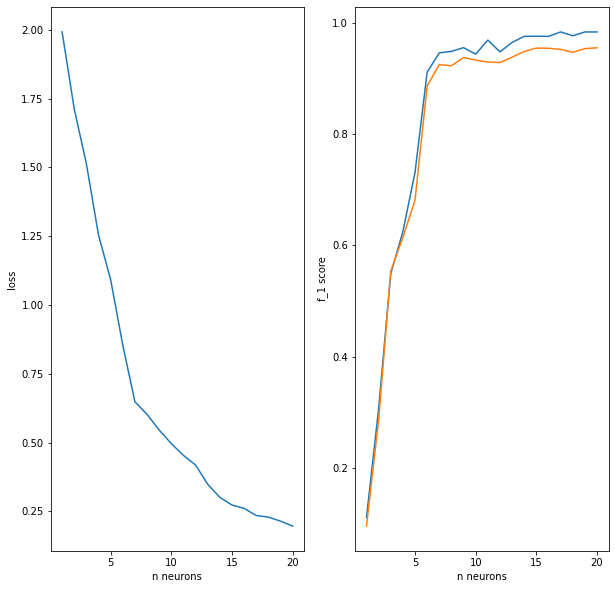

In [23]:
plt.figure(1,figsize = (10,10))
plt.subplot(1,2,1)
plt.plot(n,loss)
plt.xlabel('n neurons')
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(n,f1_s_train,label="train")
plt.plot(n,f1_s_test,label="test")
plt.xlabel('n neurons')
plt.ylabel('f_1 score')
plt.savefig("loss_f1.png")

In [24]:
#coeficientes para el número de neuronas óptimo
n_opt=7
mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                           hidden_layer_sizes=(n_opt), 
                                           max_iter=200)
mlp.fit(X_train, Y_train)
opt_coef=mlp.coefs_
loss=np.append(loss,mlp.loss_)
f1_s=np.append(f1_s,sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro'))


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [1]:
plt.figure(figsize=(30, 20))
scale = np.max(mlp.coefs_[0])
plt.figure()
for i in range(7):
    l1_plot = plt.subplot(2, 4, i + 1)
    l1_plot.imshow(opt_coef[0][:,i].reshape(8, 8), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Neuron {}'.format(i+1) )
plt.savefig("neuronas.png")

NameError: name 'plt' is not defined